# Ensemble Techniques: Travel Package Purchase Prediction

## Description
#### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

**Customer details:**

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:**

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,  BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

### Read dataset

In [2]:
travel = pd.read_excel('Tourism.xlsx')

#### View head and tail

In [3]:
travel.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [4]:
travel.tail(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [5]:
#understand shape
travel.shape

(4888, 20)

* There are 4,888 rows and 20 columns.

In [6]:
#check data types
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* There are missing values in the *Age*, *TypeofContact*, *DurationOfPitch*, *NumberOfFollowups*, *PerferredPropertyStar*, *NumberOfTrips*, *NumberOfChildrenVisiting* and *MonthlyIncome* columns.

* Object columns: *TypeofContact*, *Occupation*, *Gender*, *ProductPitched*, *MaritalStatus*, and *Designation*

In [7]:
#summary of missing values
travel.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
#Looking at the statistics, possible outliers
travel.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


* The average customer age is ~38, with a min age of 18 and max age of 61.
* Average DurationofPitch is 15.49.
* Average MontlyIncome is 23619.85.

In [9]:
travel['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

Lets convert the columns with an 'object' datatype into categorical variables

In [10]:
for feature in travel.columns: # Loop through all columns in the dataframe
    if travel[feature].dtype == 'object': # Only apply for columns with categorical strings
        travel[feature] = pd.Categorical(travel[feature])# Replace strings with an integer
travel.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [11]:
print(travel.TypeofContact.value_counts())
print('*'*50)
print(travel.Occupation.value_counts())
print('*'*50)
print(travel.Gender.value_counts())
print('*'*50)
print(travel.ProductPitched.value_counts())
print('*'*50)
print(travel.MaritalStatus.value_counts())
print('*'*50)
print(travel.Designation.value_counts())
print('*'*50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************


* TypeofContact: Most of the contacts were Self Enquiry.
* Occupation: Most of the customers are Salaried.
* Gender: Most of the customers are Men.
* ProductPitched: The Basic package was pitched the most, followed by the Deluxe package.
* MaritalStatus: Most of the customers are Married.
* Designation: Most of the customers are Executives, followed by Managers.

In [12]:
travel.replace(to_replace='Fe Male',value = 'Female',inplace=True) #combine Fe Male and Female as one 

In [13]:
print(travel.Gender.value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


In [14]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [15]:
travel.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [16]:
#drop CustomerID
travel = travel.drop(['CustomerID'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Age

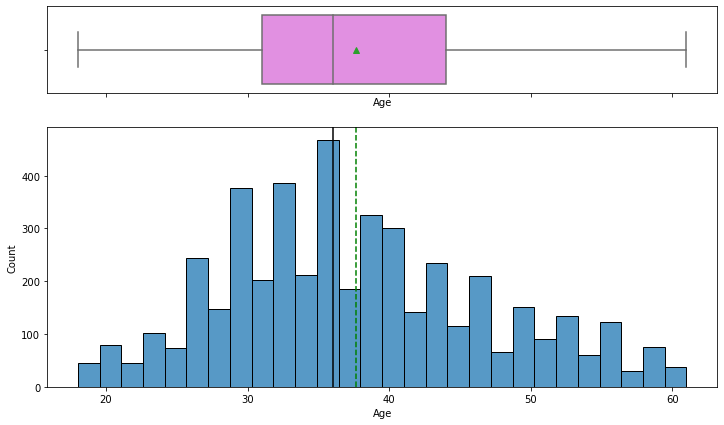

In [18]:
histogram_boxplot(travel,'Age')

* The distribution of Age is slightly skewed to the right.
* The mean Age is ~38 and the median Age is 36.

### Observations on NumberOfPersonVisiting

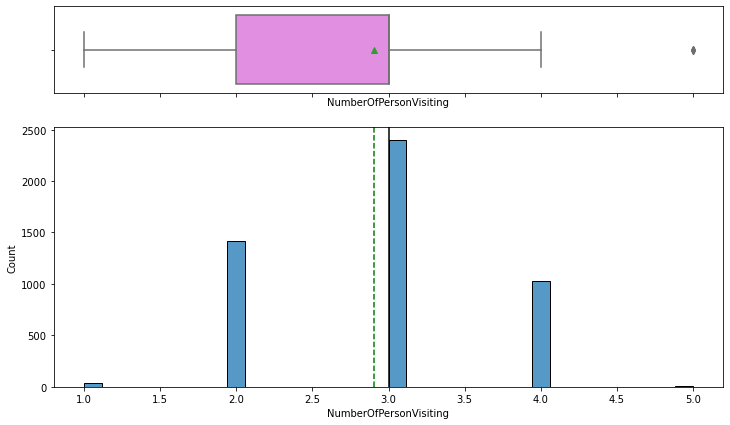

In [19]:
histogram_boxplot(travel,'NumberOfPersonVisiting')

* The average NumberOfPersonVisiting is ~3.
* There are outliers in this column.

### Observations on PreferredPropertyStar

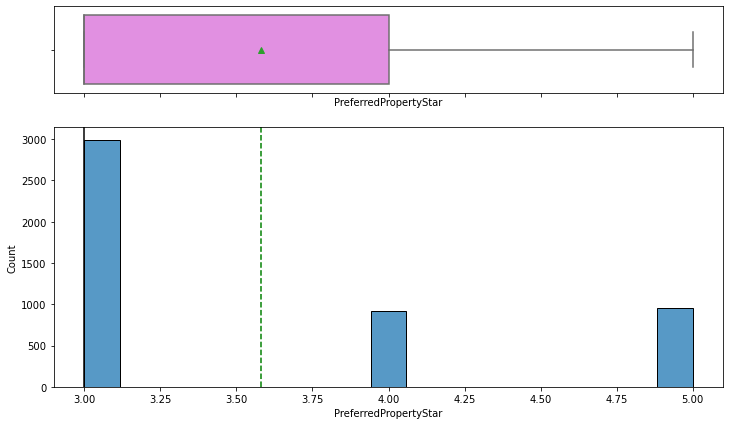

In [20]:
histogram_boxplot(travel,'PreferredPropertyStar')

* The median PreferredPropertyStar is 3.

### Observersations on NumberOfTrips

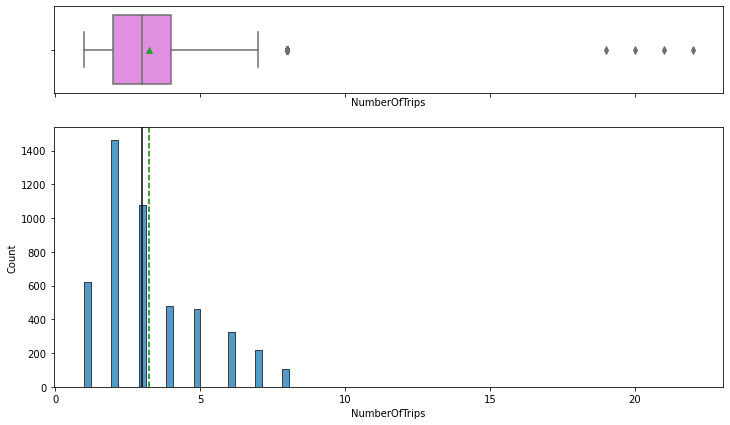

In [21]:
histogram_boxplot(travel,'NumberOfTrips')

* The mean and median NumberOfTrips is ~3.

### Observations on NumberOfChildrenVisiting

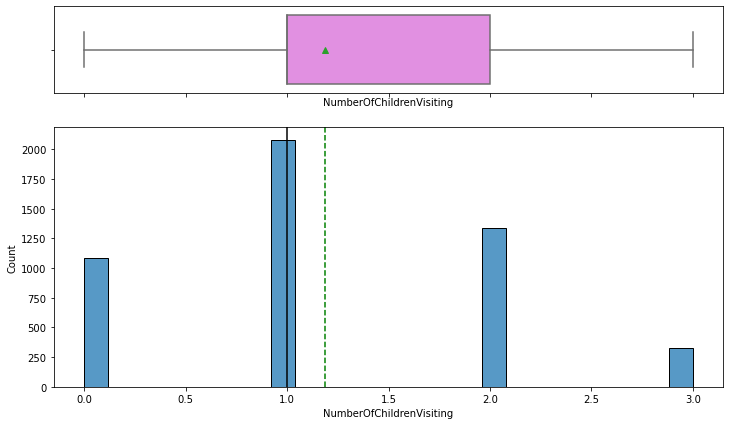

In [22]:
histogram_boxplot(travel,'NumberOfChildrenVisiting')

* The median NumberOfChildrenVisiting is 1, with a max of 3.

### Observations on MonthlyIncome

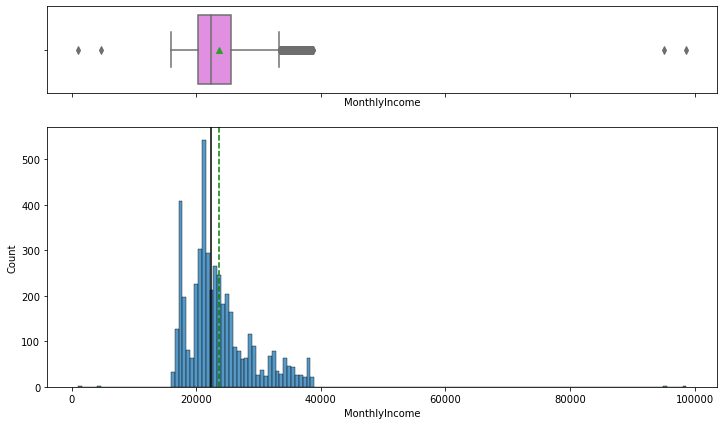

In [23]:
histogram_boxplot(travel,'MonthlyIncome')

* The average MonthlyIncome is 23619.85. 
* The distribution is skewed to the right.
* There are outliers.

#### Function to create barplots that indicate percentage for each category

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on ProdTaken

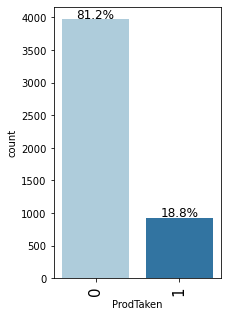

In [25]:
labeled_barplot(travel, "ProdTaken",perc=True)

* 81.2% of customers did not purchase the package.

### Observations on TypeofContact

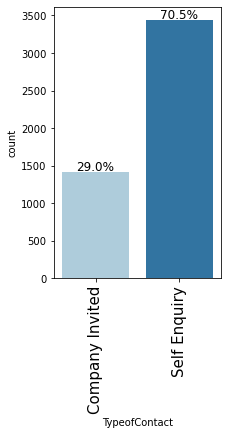

In [26]:
labeled_barplot(travel, "TypeofContact",perc=True)

* 70.5% of customers were Self Enquiry

### Observations on CityTier

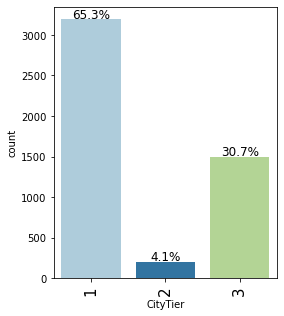

In [27]:
labeled_barplot(travel, "CityTier",perc=True)

* 65.3% of customers are Tier 1.

### Observations on Occupation

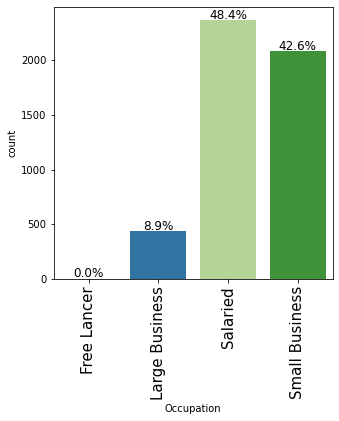

In [28]:
labeled_barplot(travel, "Occupation",perc=True)

* 48.4% of customers are Salaried.

### Observations on Gender

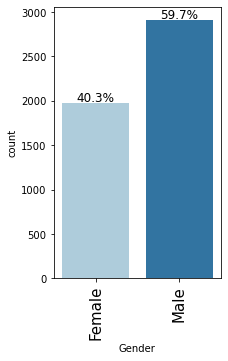

In [29]:
labeled_barplot(travel, "Gender",perc=True)

* 59.7% of customers are Male.

### Observations on MaritalStatus

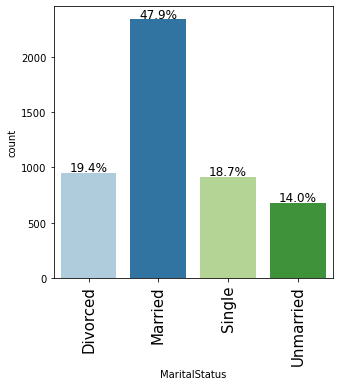

In [30]:
labeled_barplot(travel, "MaritalStatus",perc=True)

* 47.9% of customers are Married.

### Observations on NumberOfTrips

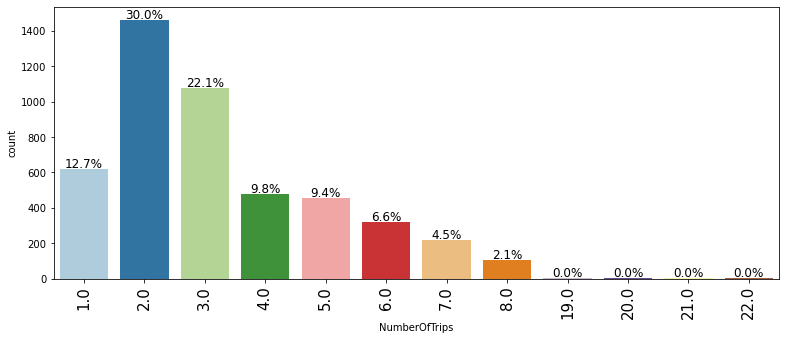

In [31]:
labeled_barplot(travel, "NumberOfTrips",perc=True)

* 30% of customers take 2 trips.

### Observations on Passport

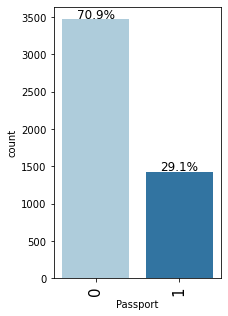

In [32]:
labeled_barplot(travel, "Passport",perc=True)

* 70.9% of customers do not have a passport.

### Observations on OwnCar

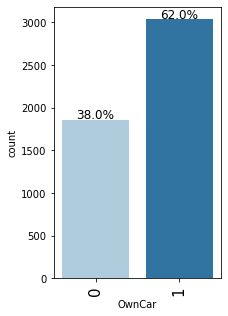

In [33]:
labeled_barplot(travel, "OwnCar",perc=True)

* 62% of customers own a car.

### Observations on NumberOfChildrenVisiting

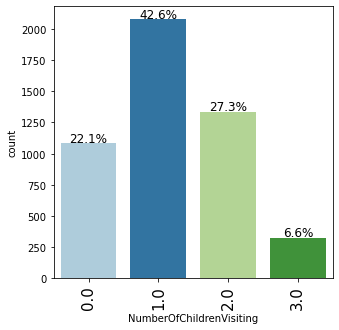

In [34]:
labeled_barplot(travel, "NumberOfChildrenVisiting",perc=True)

* 42.6% have 1 child visiting, followed by 27.3% having 2 children visiting.

### Observations on Designation

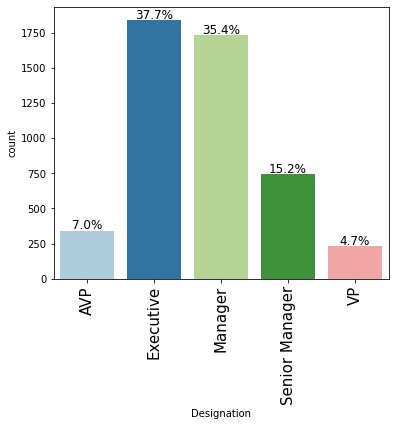

In [35]:
labeled_barplot(travel, "Designation",perc=True)

* 37.7% of customers are Executives.
* 35.4% of customers are Managers.

### Bivariate Analysis

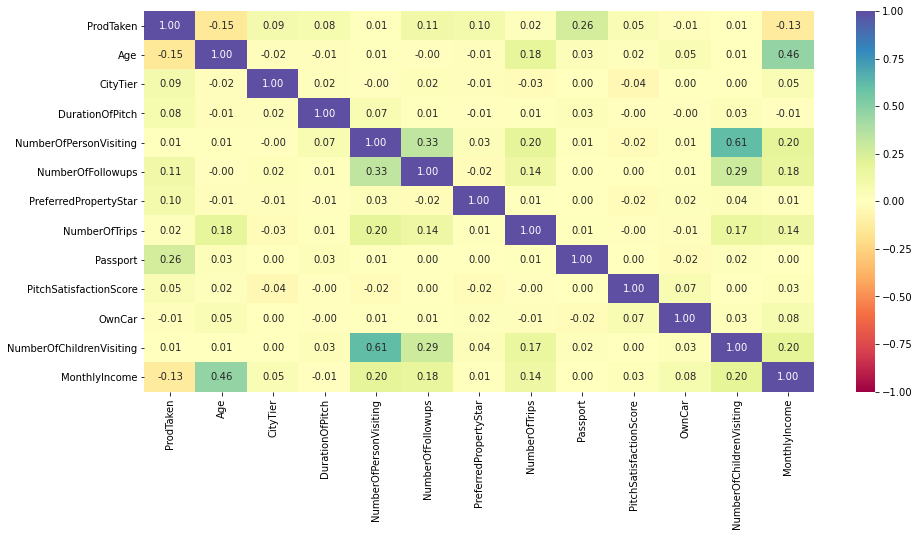

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(travel.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* Age and ProdTaken have a negative relationship but the correlation is not too strong to conclude.
* Age and Monthly income have a positive relationship and a low to moderate correlation.
* NumberOfChildrenVisiting and NumberOfPersonVisiting have a positive relationship which is expected. Children are counted in the total number of persons visiting.
* Passport and ProdTaken have a positive relationship. There are increased options to travel when you have a passport.
* NumberOfFollowups and NumberOfPersonVisiting (and NumberOfChildrenVisiting) have a positive relationship. This is an interesting correlation, it's not too strong to make a conclusion. 
* There is a negative relationship between MontlyIncome and ProdTaken.

In [140]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,travel['ProdTaken'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,travel['ProdTaken'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


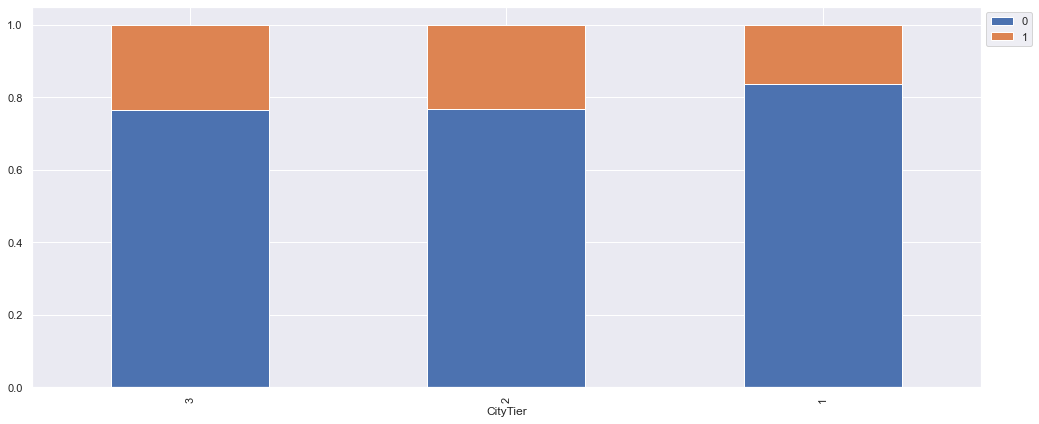

In [38]:
stacked_plot(travel['CityTier'])

* More customers that looked at Tiers 2 and 3 purchased them. 

### ProdTaken vs TypeOfContact

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


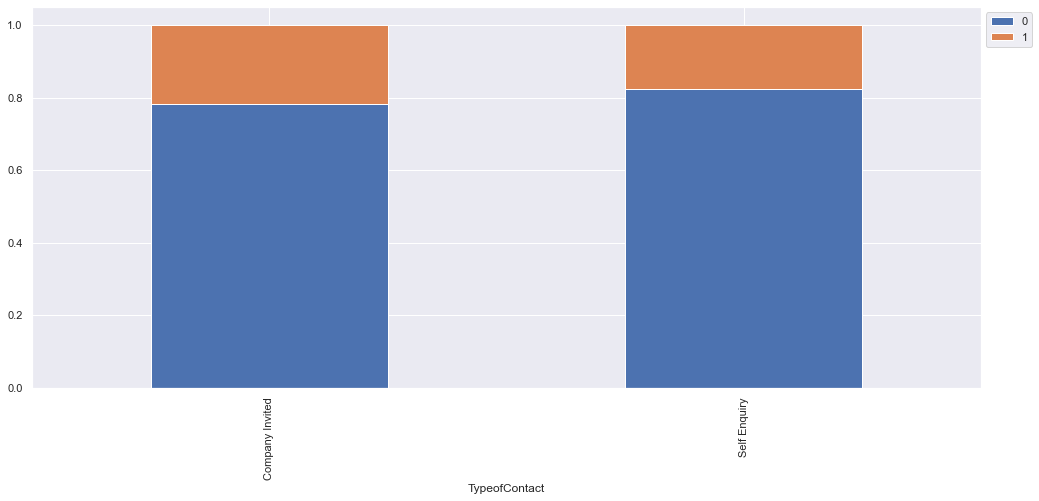

In [39]:
stacked_plot(travel['TypeofContact'])

* Customers were more likely to buy when company invited.

### ProdTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


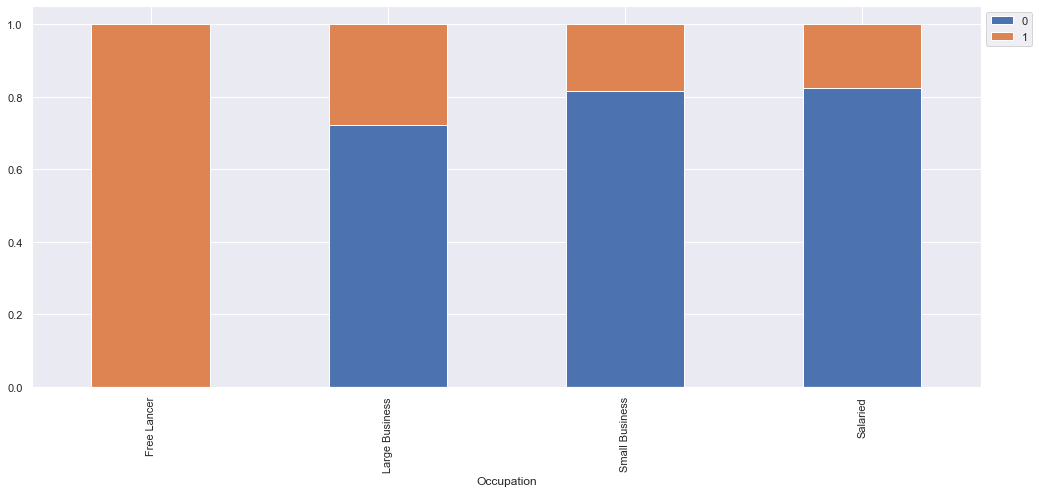

In [40]:
stacked_plot(travel['Occupation'])

* Although it's a very small number overall, both Free Lancers purchased a package.
* Customer with the occupation of Large Business were the next largest group to purchase a package at 27.6%.

### ProdTaken vs Gender

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


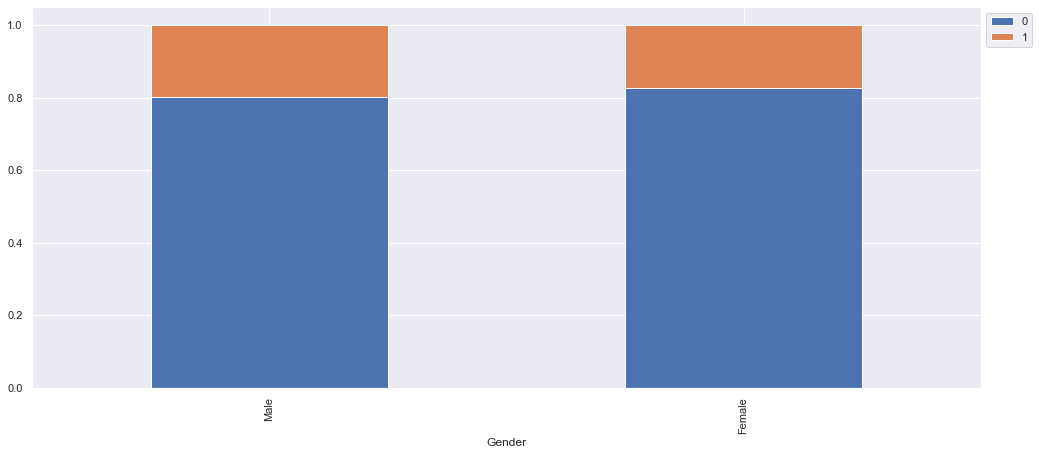

In [41]:
stacked_plot(travel['Gender'])

* Males are most likely to purchase.

### ProdTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


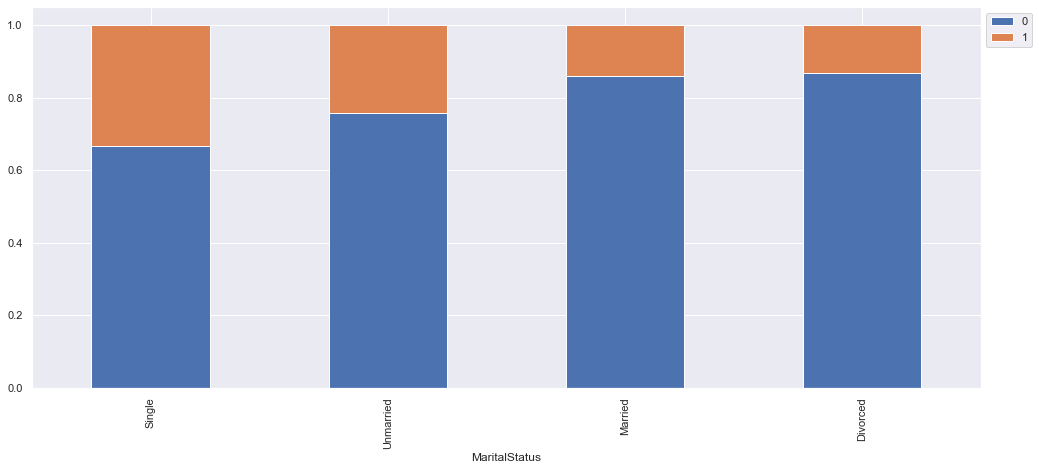

In [42]:
stacked_plot(travel['MaritalStatus'])

* Customers that are Single were more likely to purchase.

### ProdTaken vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


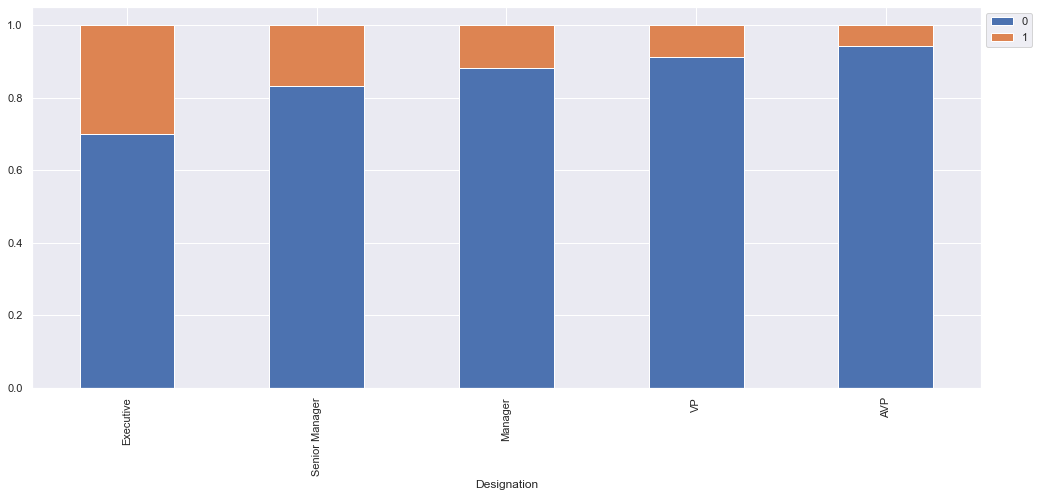

In [43]:
stacked_plot(travel['Designation'])

* Executives are most likely to purchase.

### ProdTaken vs ProductPitchted

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


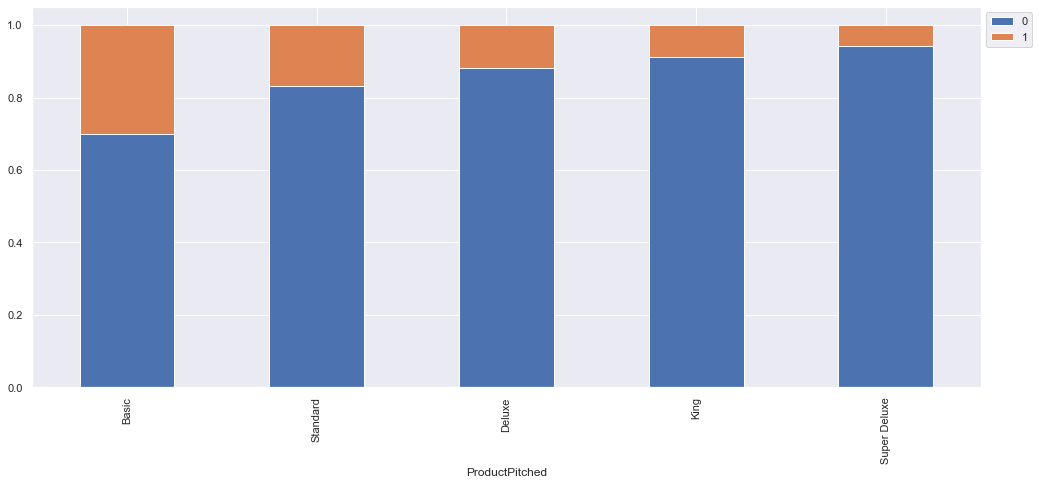

In [44]:
stacked_plot(travel['ProductPitched'])

* Customers that were pitched the basic package were more likely to purchase.

In [45]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} of a customer who purchased the package',fontsize=12,fontweight='bold')
    sns.distplot(travel[(travel[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of a customer who purchased the package",fontsize=12,fontweight='bold')
    sns.distplot(travel[(travel[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t ProdTaken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(travel[target],travel[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t ProdTaken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(travel[target],travel[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### ProdTaken vs Age

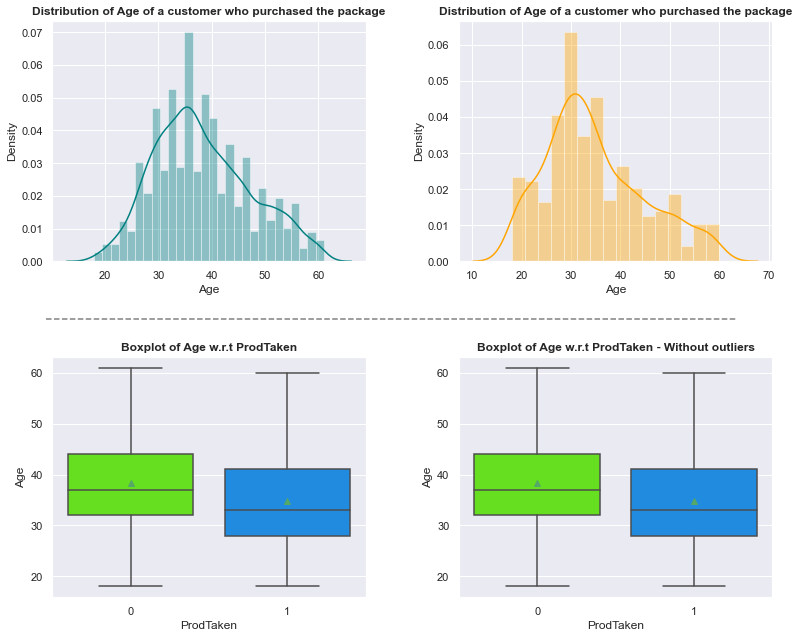

In [46]:
plot('Age')

* The distributions look the same with and without outliers.

### ProdTaken vs CityTier

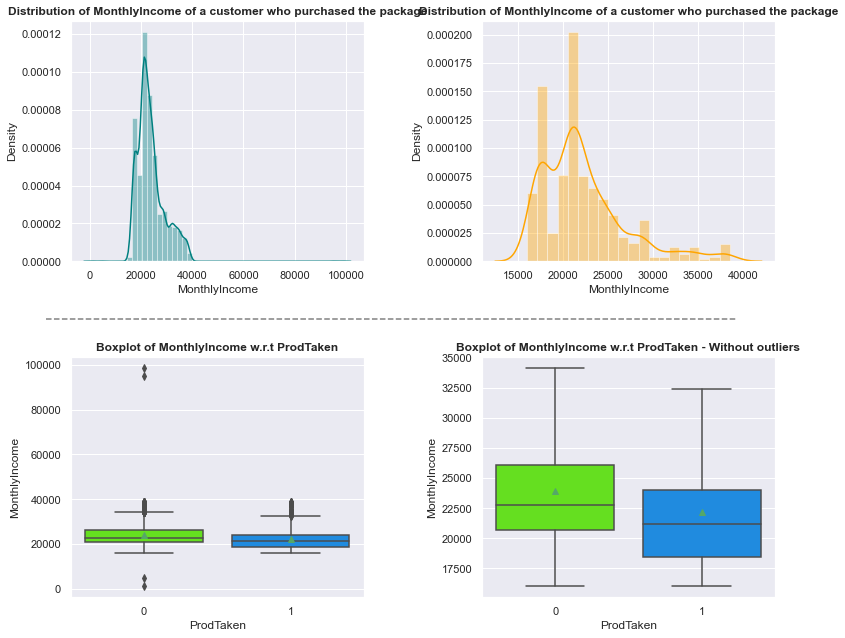

In [47]:
plot('MonthlyIncome')

### ProdTaken vs NumberOfFollowups

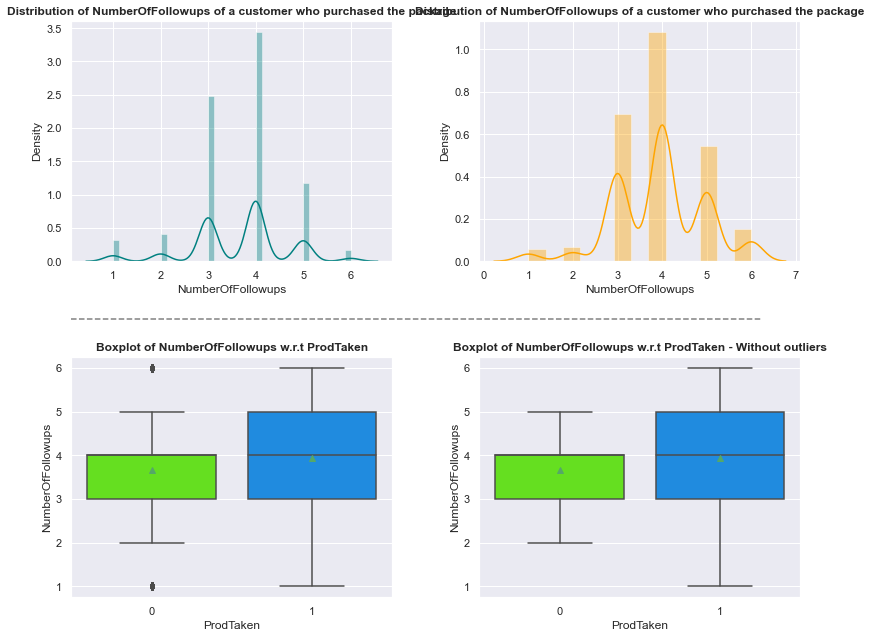

In [48]:
plot('NumberOfFollowups')

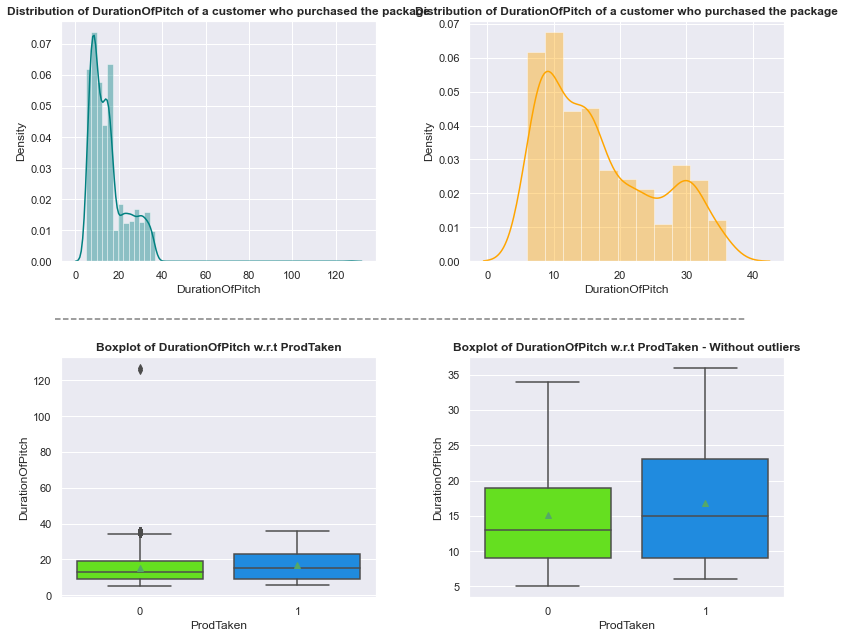

In [49]:
plot('DurationOfPitch')

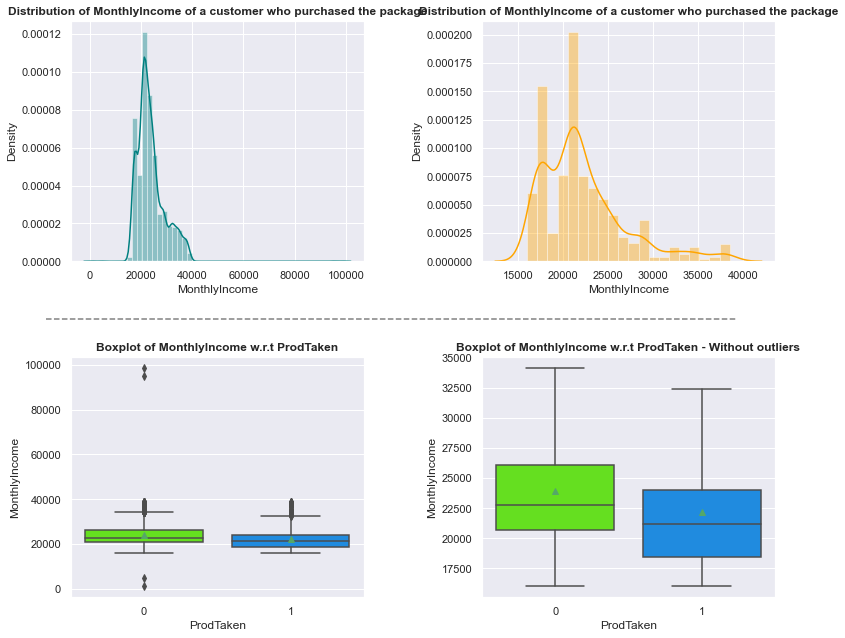

In [50]:
plot('MonthlyIncome')

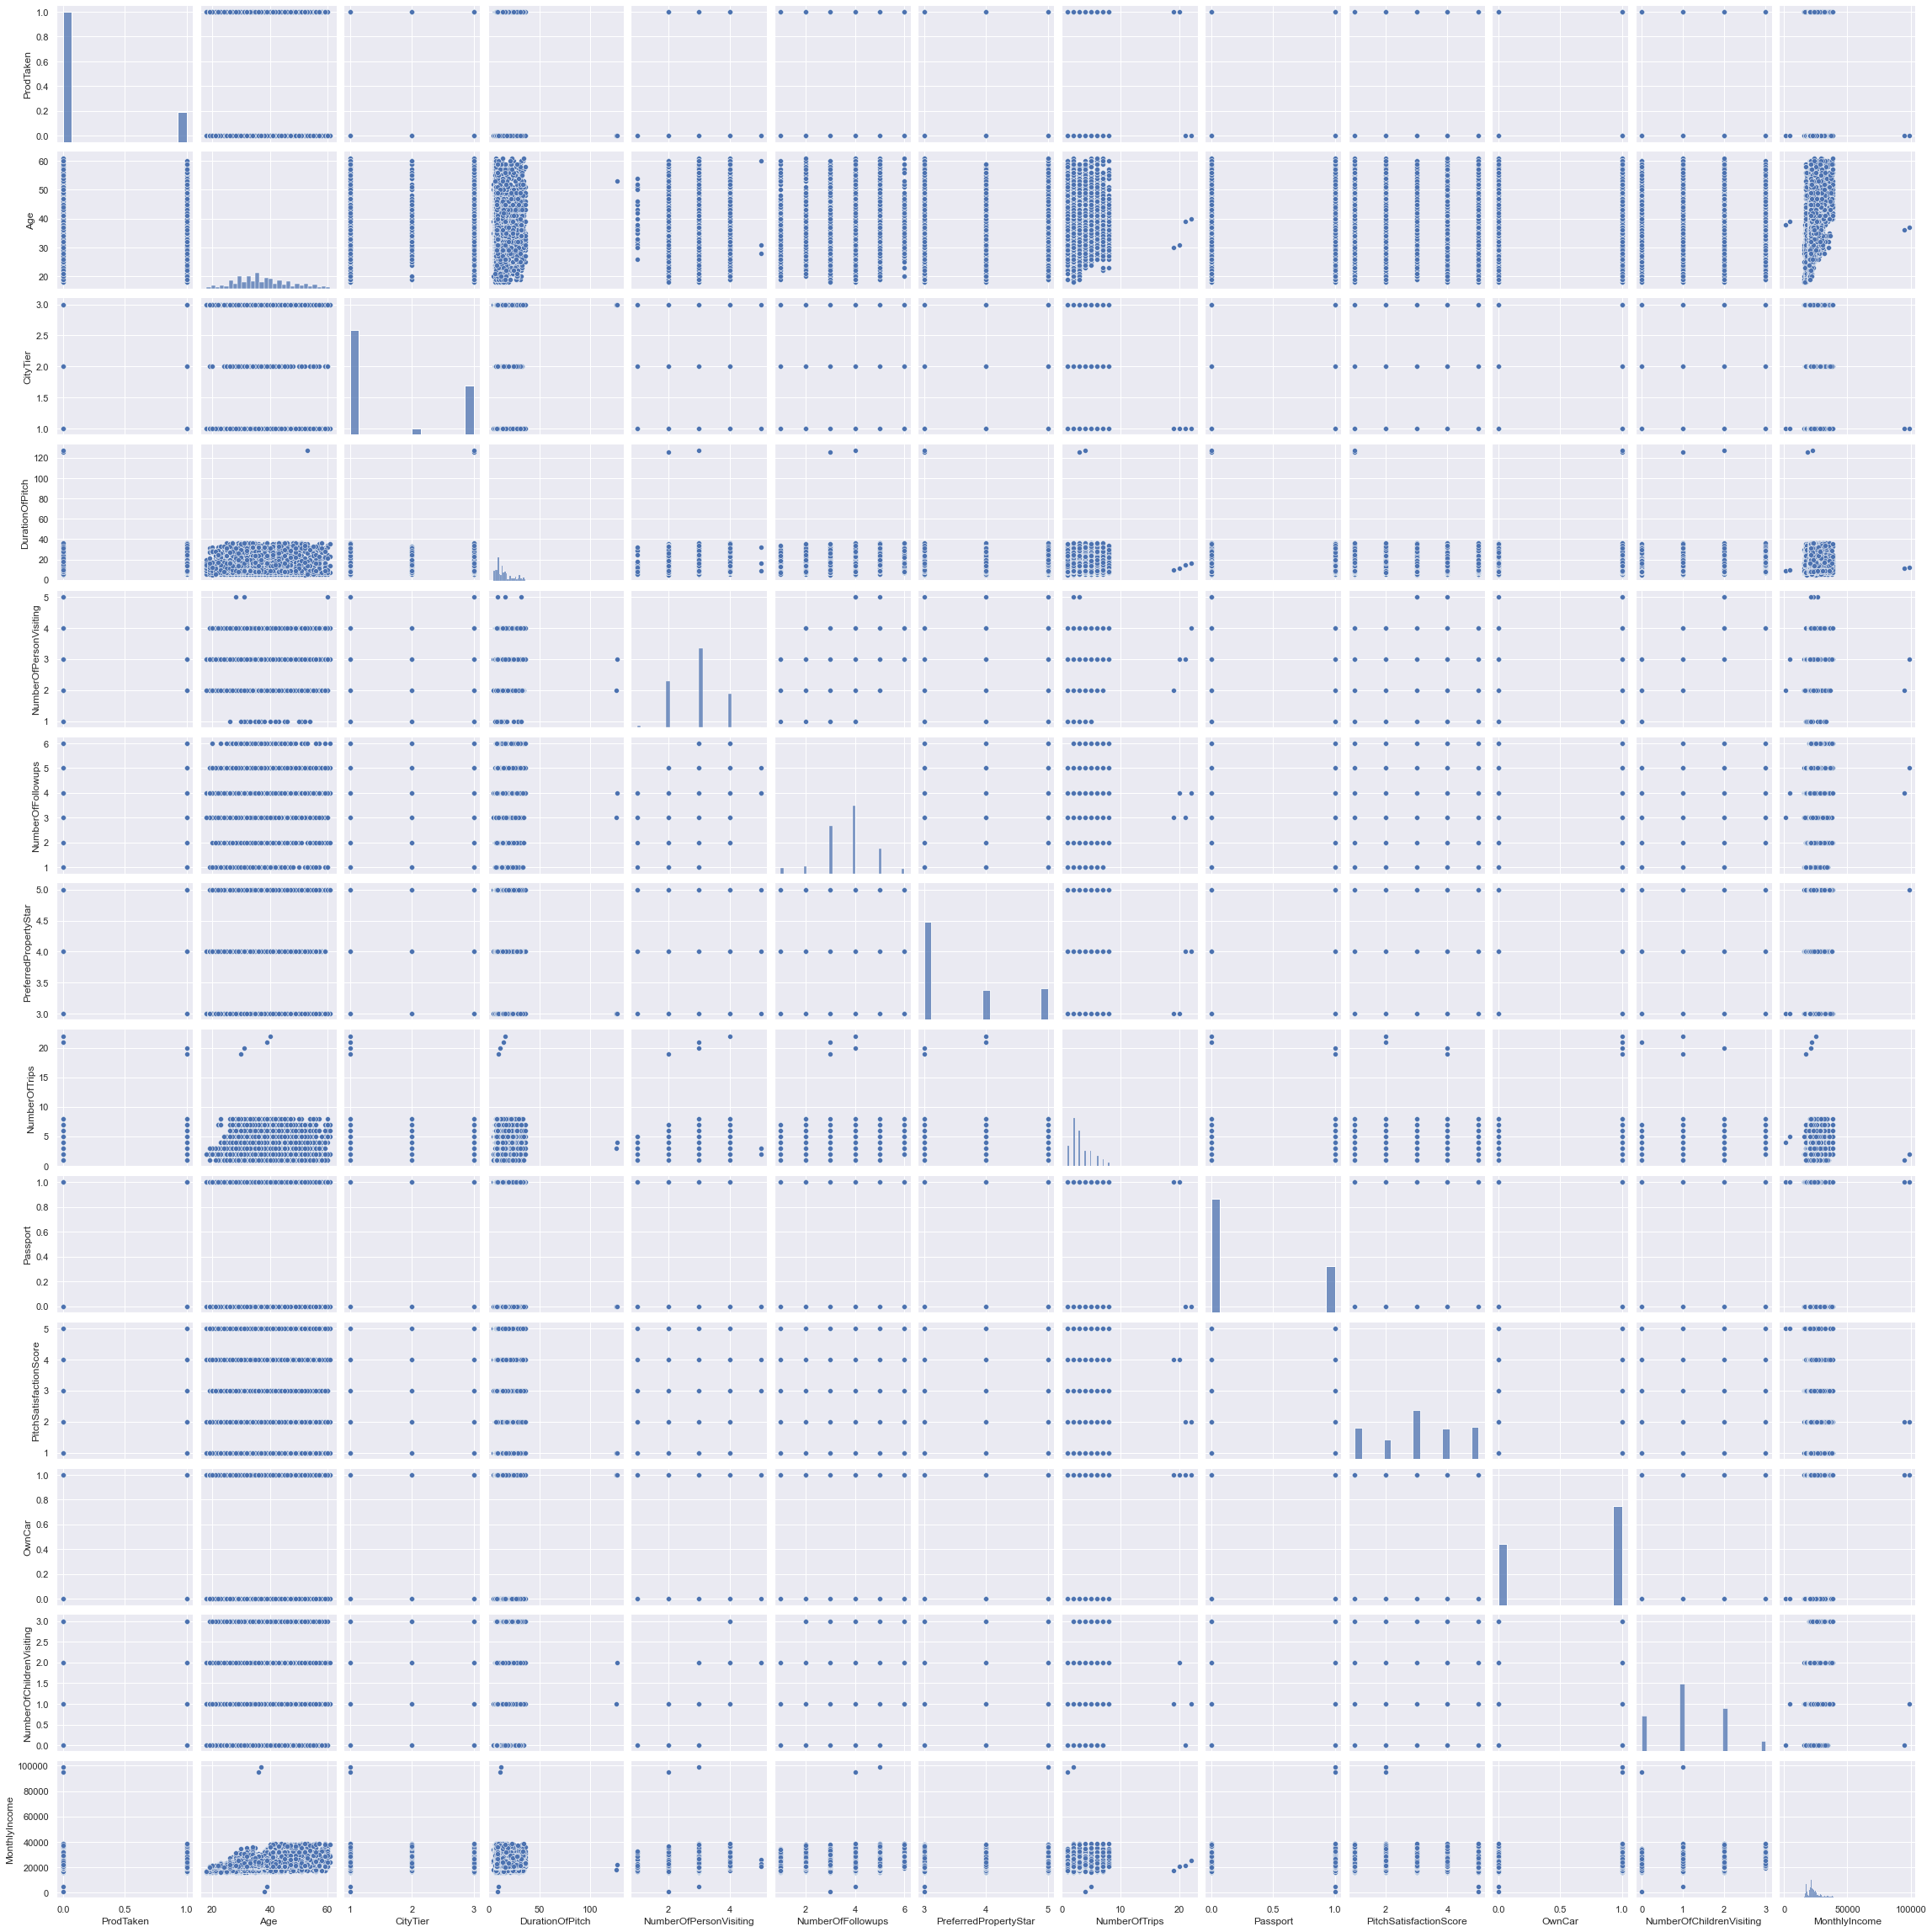

In [51]:
sns.pairplot(travel)

### Summary of EDA

* The mean age of the customer is about 38.
* Executives are more likely to purchase the package.
* Single customers are more likely to purchase the package.
* 29.1% of the customers have a passport.
* 30% of the customers take two trips.
* 18.8% of the customers purchased the travel package.

#### Let's find the percentage of outliers, in each column of the data, using IQR.

In [52]:
Q1 = travel.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = travel.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [53]:
((travel.select_dtypes(include=['float64','int64'])<lower) | (travel.select_dtypes(include=['float64','int64'])>upper)).sum()/len(travel)*100

ProdTaken                   18.821604
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              0.040917
NumberOfPersonVisiting       0.061375
NumberOfFollowups            6.382979
PreferredPropertyStar        0.000000
NumberOfTrips                2.229951
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.058101
dtype: float64

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in a real case scenario (in ProdTaken, DurationOfPitch, NumberofPersonVisiting, NumberOfFollowups, NumberOfTrips and MonthlyIncome) and we would want our model to learn the underlying pattern for such customers.

### Data Preparation

* We have 6 categorical independent variables but 2 of them are binary, so we'll have the same results with them even after creating dummies.
* So we will only make dummies for Occupation, MaritalStatus, Designation, and ProductPitched.

In [54]:
replaceStruct = {
                "TypeofContact": {"Self Enquiry": 1, "Company Invited": 2},
                "Gender": {"Male": 1, "Female":2},
                    }
oneHotCols=["ProductPitched","MaritalStatus","Designation", "Occupation"]

In [55]:
travel=travel.replace(replaceStruct)
travel=pd.get_dummies(travel, columns=oneHotCols)
travel.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,...,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,1,41.0,1.0,3,6.0,2,3,3.0,3.0,1.0,...,0,0,0,1,0,0,0,0,1,0
1,0,49.0,2.0,1,14.0,1,3,4.0,4.0,2.0,...,0,0,0,1,0,0,0,0,1,0
2,1,37.0,1.0,1,8.0,1,3,4.0,3.0,7.0,...,0,0,1,0,0,0,1,0,0,0
3,0,33.0,2.0,1,9.0,2,2,3.0,3.0,2.0,...,0,0,1,0,0,0,0,0,1,0
4,0,NaN,1.0,1,8.0,1,2,3.0,4.0,1.0,...,0,0,1,0,0,0,0,0,0,1
5,0,32.0,2.0,1,8.0,1,3,3.0,3.0,1.0,...,0,0,1,0,0,0,0,0,1,0
6,0,59.0,1.0,1,9.0,2,2,2.0,5.0,5.0,...,0,0,1,0,0,0,0,0,0,1
7,0,30.0,1.0,1,30.0,1,3,3.0,3.0,2.0,...,0,0,1,0,0,0,0,0,1,0
8,0,38.0,2.0,1,29.0,1,2,4.0,3.0,1.0,...,1,0,0,0,1,0,0,0,1,0
9,0,36.0,1.0,1,33.0,1,3,3.0,3.0,7.0,...,0,0,0,1,0,0,0,0,0,1


### Treatment of missing values
* Categorical columns that have missing values will be replaced with mode.
* Numerical columns that have missing values will be replaced with mean.

In [56]:
travel['MonthlyIncome'].fillna((travel['MonthlyIncome'].mean()), inplace=True) 
#replace NaN values with mean of MonthlyIncome col

In [57]:
travel['MonthlyIncome'].head(10)

0    20993.0
1    20130.0
2    17090.0
3    17909.0
4    18468.0
5    18068.0
6    17670.0
7    17693.0
8    24526.0
9    20237.0
Name: MonthlyIncome, dtype: float64

In [58]:
travel['Age'].fillna((travel['Age'].mean()), inplace=True) 
travel['Age'].head(10)

0    41.000000
1    49.000000
2    37.000000
3    33.000000
4    37.622265
5    32.000000
6    59.000000
7    30.000000
8    38.000000
9    36.000000
Name: Age, dtype: float64

In [59]:
travel['TypeofContact'].fillna(travel['TypeofContact'].mode()[0], inplace=True) 
travel['TypeofContact'].head(10)

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
5    2.0
6    1.0
7    1.0
8    2.0
9    1.0
Name: TypeofContact, dtype: float64

In [60]:
travel['DurationOfPitch'].fillna((travel['DurationOfPitch'].mean()), inplace=True) 
travel['DurationOfPitch'].head(10)

0     6.0
1    14.0
2     8.0
3     9.0
4     8.0
5     8.0
6     9.0
7    30.0
8    29.0
9    33.0
Name: DurationOfPitch, dtype: float64

In [61]:
travel['NumberOfFollowups'].fillna((travel['NumberOfFollowups'].mean()), inplace=True) 
travel['NumberOfFollowups'].head(10)

0    3.0
1    4.0
2    4.0
3    3.0
4    3.0
5    3.0
6    2.0
7    3.0
8    4.0
9    3.0
Name: NumberOfFollowups, dtype: float64

In [62]:
travel['PreferredPropertyStar'].fillna((travel['PreferredPropertyStar'].mean()), inplace=True) 
travel['PreferredPropertyStar'].head(10)

0    3.0
1    4.0
2    3.0
3    3.0
4    4.0
5    3.0
6    5.0
7    3.0
8    3.0
9    3.0
Name: PreferredPropertyStar, dtype: float64

In [63]:
travel['NumberOfTrips'].fillna((travel['NumberOfTrips'].mean()), inplace=True) 
travel['NumberOfTrips'].head(10)

0    1.0
1    2.0
2    7.0
3    2.0
4    1.0
5    1.0
6    5.0
7    2.0
8    1.0
9    7.0
Name: NumberOfTrips, dtype: float64

In [64]:
travel['NumberOfChildrenVisiting'].fillna((travel['NumberOfChildrenVisiting'].mean()), inplace=True) 
travel['NumberOfChildrenVisiting'].head(10)

0    0.0
1    2.0
2    0.0
3    1.0
4    0.0
5    1.0
6    1.0
7    1.0
8    0.0
9    0.0
Name: NumberOfChildrenVisiting, dtype: float64

In [65]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4888 non-null   int64  
 1   Age                          4888 non-null   float64
 2   TypeofContact                4888 non-null   float64
 3   CityTier                     4888 non-null   int64  
 4   DurationOfPitch              4888 non-null   float64
 5   Gender                       4888 non-null   int64  
 6   NumberOfPersonVisiting       4888 non-null   int64  
 7   NumberOfFollowups            4888 non-null   float64
 8   PreferredPropertyStar        4888 non-null   float64
 9   NumberOfTrips                4888 non-null   float64
 10  Passport                     4888 non-null   int64  
 11  PitchSatisfactionScore       4888 non-null   int64  
 12  OwnCar                       4888 non-null   int64  
 13  NumberOfChildrenVi

### Splitting the data into train and test sets

* When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done by setting the *stratify* parameter to target variable in the train_test_split function.

In [66]:
X = travel.drop("ProdTaken", axis=1)
y = travel.pop("ProdTaken")

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

## Building the model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will take the travel package and the customer doesn't take the package - Loss of opportunity
2. Predicting a customer will not take the travel package and the customer takes the package - Loss of resources

### Which case is more important? 

* Predicting a customer will not take the travel package and the customer takes the package

### How to reduce this loss i.e need to reduce False Negatives?

* We are going to build 2 ensemble models here - Bagging Classifier and Random Forest Classifier.
* First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
* We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.


* The get_metrics_score function will be used to check the model performance of models

In [68]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [69]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bagging Classifier

In [70]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [71]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9935691318327974
Accuracy on test set :  0.9079754601226994
Recall on training set :  0.967391304347826
Recall on test set :  0.5905797101449275
Precision on training set :  0.9983974358974359
Precision on test set :  0.8810810810810811


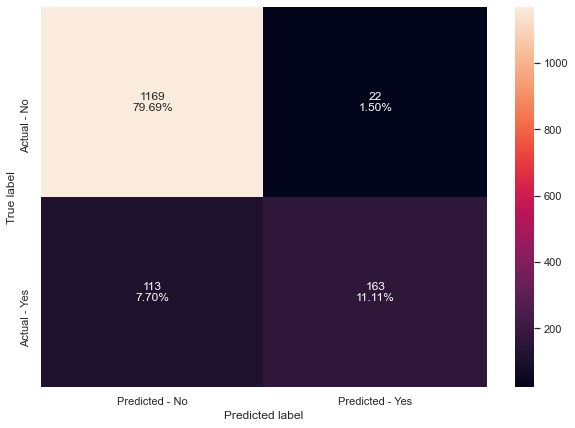

In [72]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [73]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [74]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.912747102931152
Recall on training set :  1.0
Recall on test set :  0.572463768115942
Precision on training set :  1.0
Precision on test set :  0.9404761904761905


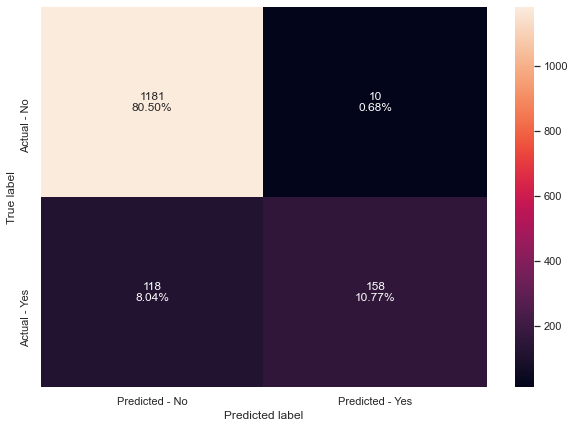

In [75]:
make_confusion_matrix(rf_estimator,y_test)

### Decision Tree Classifier

In [76]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [77]:
dtree_estimator_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8841172460804363
Recall on training set :  1.0
Recall on test set :  0.6521739130434783
Precision on training set :  1.0
Precision on test set :  0.7086614173228346


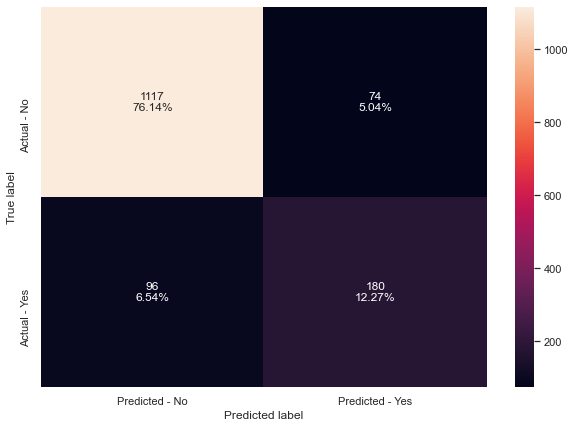

In [78]:
make_confusion_matrix(dtree,y_test)

### Visualizing the Decision Tree

In [79]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'ProductPitched_Basic', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_AVP', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business']


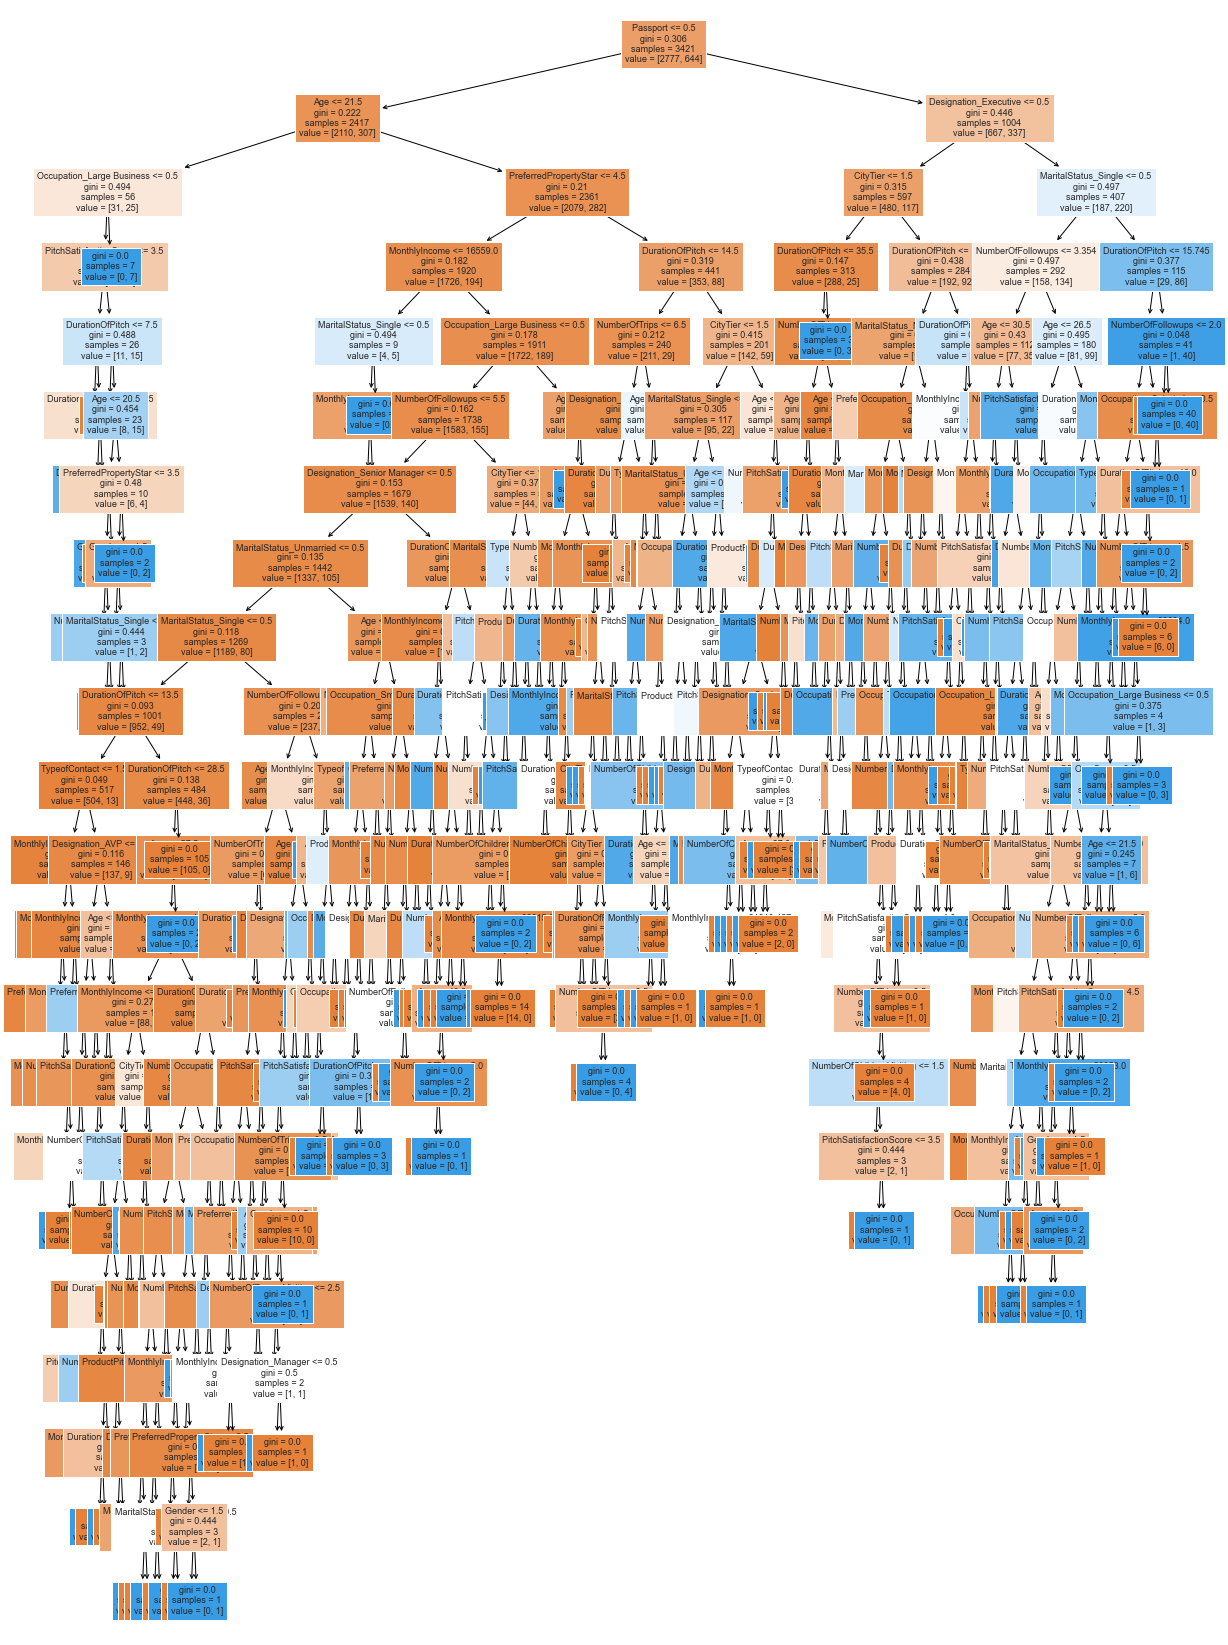

In [80]:
from sklearn import tree
plt.figure(figsize=(20,30))
out = tree.plot_tree(dtree,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


In [81]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- Age <= 21.50
|   |   |--- Occupation_Large Business <= 0.50
|   |   |   |--- PitchSatisfactionScore <= 3.50
|   |   |   |   |--- Gender <= 1.50
|   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |--- Gender >  1.50
|   |   |   |   |   |--- DurationOfPitch <= 15.75
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |--- DurationOfPitch >  15.75
|   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |--- PitchSatisfactionScore >  3.50
|   |   |   |   |--- DurationOfPitch <= 7.50
|   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- DurationOfPitch >  7.50
|   |   |   |   |   |--- Age <= 20.50
|   |   |   |   |   |   |--- DurationOfPitch <= 18.25
|   |   |   |   |   |   |   |--- Gender <= 1.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |   |   |   |   |--- Gender >  1.50
|   |   |   |   |   |   |   |   |--- NumberOfFollowups <= 3.50

In [82]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Age                          0.159568
DurationOfPitch              0.118891
MonthlyIncome                0.103146
NumberOfTrips                0.076502
PitchSatisfactionScore       0.068143
Designation_Executive        0.062710
Passport                     0.059067
CityTier                     0.051719
NumberOfFollowups            0.050250
MaritalStatus_Single         0.030386
PreferredPropertyStar        0.026218
TypeofContact                0.023753
Gender                       0.021829
MaritalStatus_Divorced       0.016057
Occupation_Large Business    0.015385
NumberOfChildrenVisiting     0.013983
OwnCar                       0.013132
Designation_Manager          0.012387
MaritalStatus_Unmarried      0.011678
Occupation_Small Business    0.011561
MaritalStatus_Married        0.010952
ProductPitched_Basic         0.009887
Occupation_Salaried          0.008470
Designation_Senior Manager   0.007198
NumberOfPersonVisiting       0.006714
ProductPitch

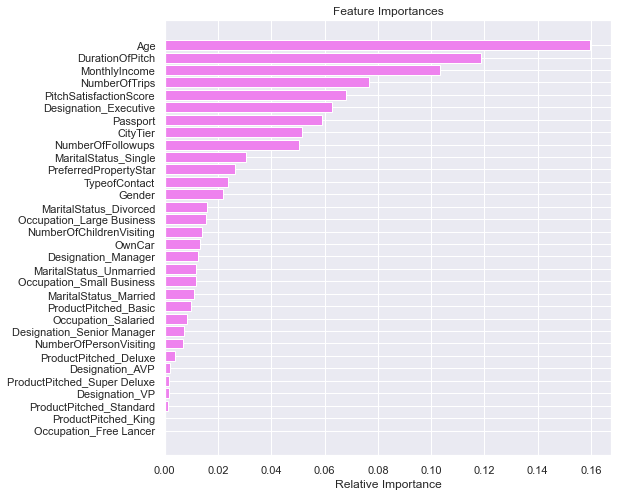

In [83]:
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* *Age*, *DurationOfPitch*, and *MonthlyIncome* are the top 3 important features of the decision tree model.

#### With default parameters:

* All three models are overfitting on the train data.
* Bagging and Random Forest have similar Accuracies on test data at 0.91.
* Decision Tree has the highest Recall on the test data at 0.65.
* Random Forest has the highest on test data at 0.94.

## Hyperparameter Tuning

### Bagging Classifier

#### Some of the important hyperparameters available for bagging classifier are:
* base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
* n_estimators: The number of trees in the forest, default = 100.
* max_features: The number of features to consider when looking for the best split.
* bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
* bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
* max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [84]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

#### Let's check different metrics for bagging classifier with best hyperparameters and build a confusion matrix.

In [85]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9202453987730062
Recall on training set :  0.9968944099378882
Recall on test set :  0.6268115942028986
Precision on training set :  1.0
Precision on test set :  0.9251336898395722


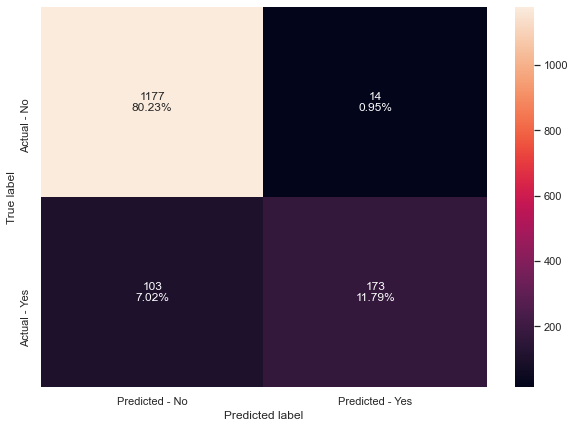

In [86]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Insights
* We can see that train Recall and Precision for the bagging classifier have increased slightly after hyperparameter tuning. 
* The test Accuracy, Recall and Precision for the bagging classifier have also increased slightly after hyperparameter tuning. 
* The confusion matrix shows that the model is better at identifying non-purchasers as compared to purchasers.

In [87]:
from sklearn.linear_model import LogisticRegression
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [88]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8383513592516808
Accuracy on test set :  0.8343558282208589
Recall on training set :  0.18633540372670807
Recall on test set :  0.17391304347826086
Precision on training set :  0.8053691275167785
Precision on test set :  0.7619047619047619


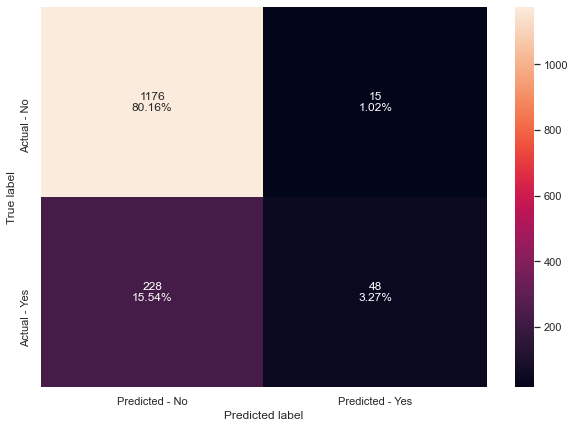

In [89]:
make_confusion_matrix(bagging_lr,y_test)

### Insights:
* Bagging classifier with logistic regression as base_estimator is not overfitting the data but the test recall is very low.

### Random Forest Classifier
#### Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:

* n_estimators: The number of trees in the forest, default = 100.

* max_features: The number of features to consider when looking for the best split.

* class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.

* For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1.

* bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.

* max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.

* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [90]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

In [91]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9058754750073078
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.5279503105590062
Recall on test set :  0.40217391304347827
Precision on training set :  0.9497206703910615
Precision on test set :  0.8409090909090909


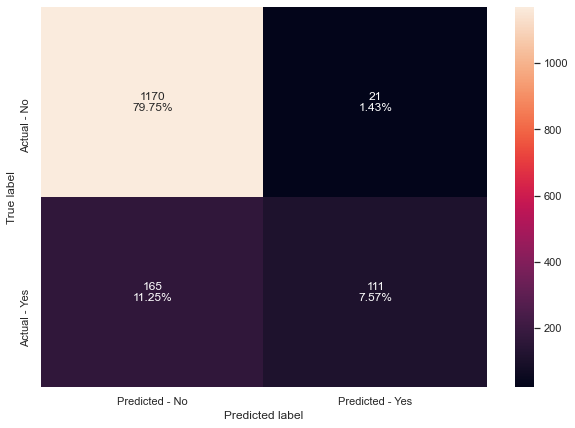

In [92]:
make_confusion_matrix(rf_estimator_tuned,y_test)

### Insights:
* The random forest's performance has decreased as compared to the random forest model with default parameters.
* The test recall is still very low. This means that the model is not good at identifying purchasers which is our primary aim here.

### Let's try using class_weights for random forest:
* The model performance is not very good. This may be due to the fact that the classes are imbalanced with 82% non-purchasers and 18% purchasers.

* We should make the model aware that the class of interest here is 'purchasers'.

* We can do so by passing the parameter class_weights available for random forest. This parameter is not available for the bagging classifier.

* class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

* We can choose class_weights={0:0.18,1:0.82} because that is the original imbalance in our data.

In [93]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.18, 1: 0.82}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features=0.2,
                       max_samples=0.6000000000000001, min_samples_leaf=9,
                       random_state=1)

In [94]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.8824904998538439
Accuracy on test set :  0.8609406952965235
Recall on training set :  0.8354037267080745
Recall on test set :  0.7355072463768116
Precision on training set :  0.645083932853717
Precision on test set :  0.6077844311377245


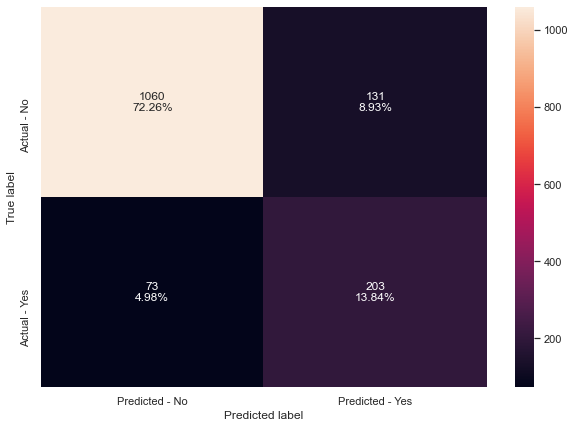

In [95]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Insights:
* The model accuracy has decreased a bit but the overfitting has also been reduced and the model is generalizing well.
* The train and test recall both have increased significantly.
* We can see from the confusion matrix that the random forest model with class weights is now better at identifying the defaulters as compared to other models.

### Decision Tree Tuning

#### Let's try Grid search
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in then hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Gridsearch
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [96]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(6,15), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=3, random_state=1)

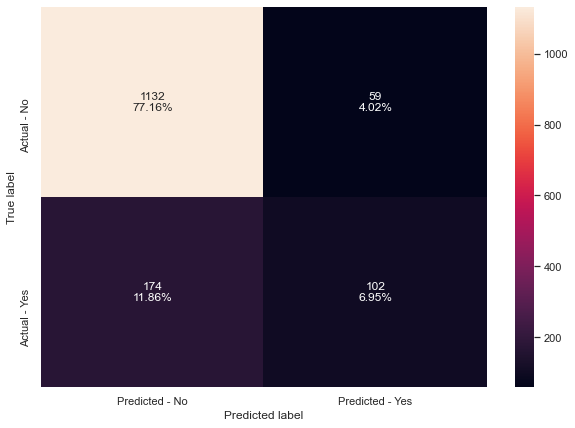

In [97]:
make_confusion_matrix(estimator,y_test)

In [98]:
# Let's check model performances for this model
dtree_tuned_scores = get_metrics_score(estimator)

Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.3416149068322981
Recall on test set :  0.3695652173913043
Precision on training set :  0.5405405405405406
Precision on test set :  0.6335403726708074


### Insights:
* This model has decrease in Accuracy, Recall and Precision. 
* However, there is less overfitting.

### Visualizing the tuned decision tree

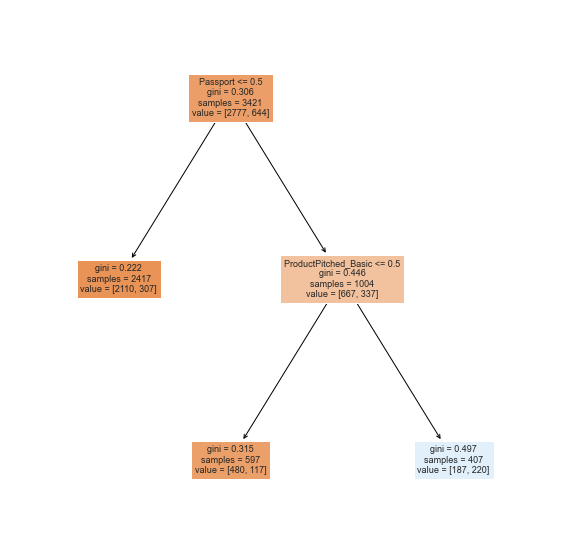

In [99]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [100]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- weights: [2110.00, 307.00] class: 0
|--- Passport >  0.50
|   |--- ProductPitched_Basic <= 0.50
|   |   |--- weights: [480.00, 117.00] class: 0
|   |--- ProductPitched_Basic >  0.50
|   |   |--- weights: [187.00, 220.00] class: 1



In [101]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Age                          0.159568
DurationOfPitch              0.118891
MonthlyIncome                0.103146
NumberOfTrips                0.076502
PitchSatisfactionScore       0.068143
Designation_Executive        0.062710
Passport                     0.059067
CityTier                     0.051719
NumberOfFollowups            0.050250
MaritalStatus_Single         0.030386
PreferredPropertyStar        0.026218
TypeofContact                0.023753
Gender                       0.021829
MaritalStatus_Divorced       0.016057
Occupation_Large Business    0.015385
NumberOfChildrenVisiting     0.013983
OwnCar                       0.013132
Designation_Manager          0.012387
MaritalStatus_Unmarried      0.011678
Occupation_Small Business    0.011561
MaritalStatus_Married        0.010952
ProductPitched_Basic         0.009887
Occupation_Salaried          0.008470
Designation_Senior Manager   0.007198
NumberOfPersonVisiting       0.006714
ProductPitch

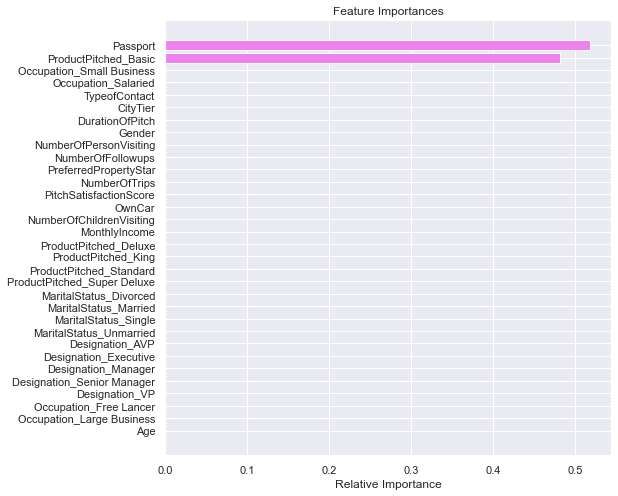

In [102]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Decision tree after pruning is giving us different important features.

### Cost Complexity Pruning
The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfitting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.



In [103]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [104]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000189,0.000568
2,0.000192,0.001720
3,0.000192,0.002297
4,0.000193,0.002877
...,...,...
182,0.004026,0.260895
183,0.004692,0.265587
184,0.005186,0.270773
185,0.016797,0.287570


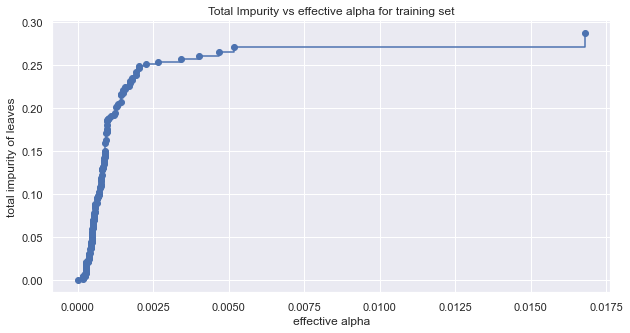

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. * The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [106]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.018052238158108525


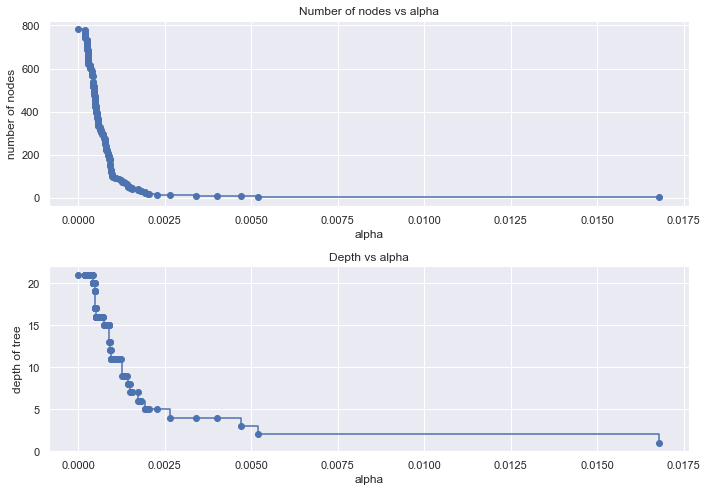

In [107]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training Recall and 91% testing Recall. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In [108]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)
    
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

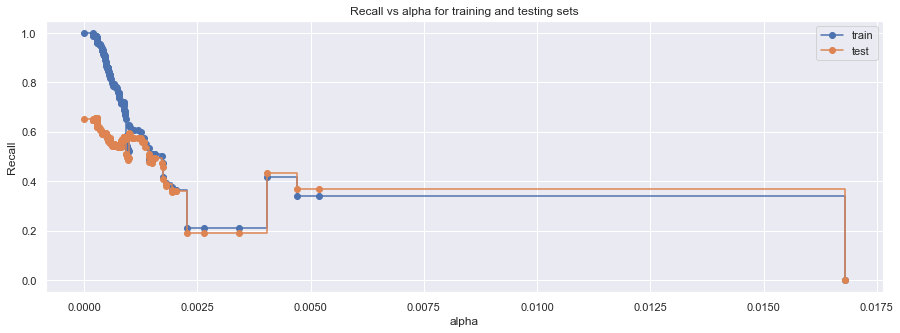

In [109]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [110]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0002557731657410114, random_state=1)


* Post-pruning using ccp alpha returns the same model as the initial model(Tree with no pruning).
* As post pruning model is the same as the initial decision tree mode, the performance and feature importance will also be the same.

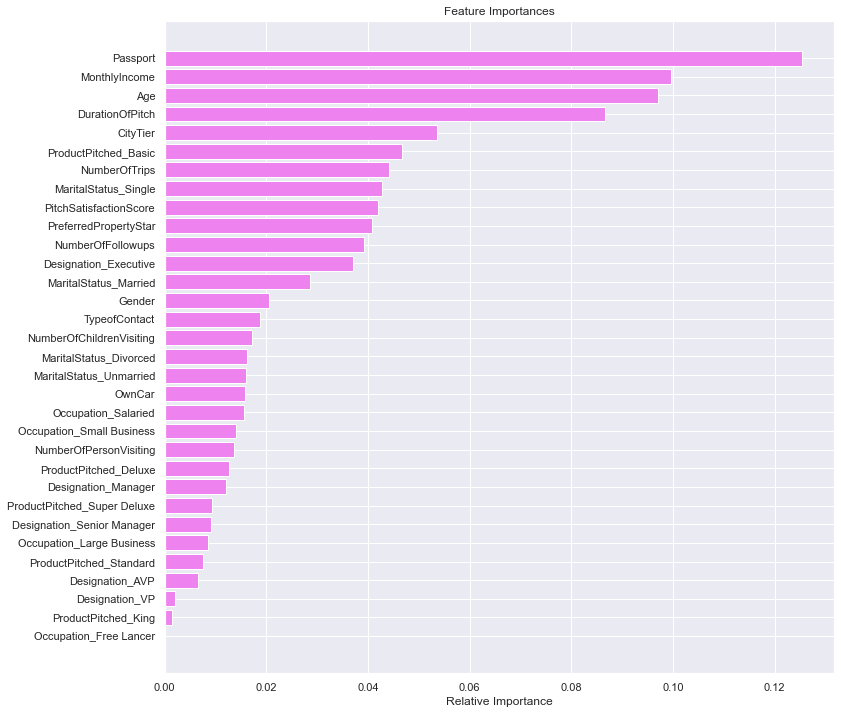

In [111]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Passport, MonthlyIncome and Age are the top 3 features.

### Comparing all of the models so far

In [112]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [113]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.91,0.97,0.59,1.00,0.88
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.63,1.00,0.93
2,Bagging classifier with base_estimator=LR,0.84,0.83,0.19,0.17,0.81,0.76
3,Random Forest with deafult parameters,1.00,0.91,1.00,0.57,1.00,0.94
4,Tuned Random Forest Classifier,0.91,0.87,0.53,0.40,0.95,0.84
5,Random Forest with class_weights,0.88,0.86,0.84,0.74,0.65,0.61


* The Tuned Random Forest Classifier has the least overfitting and is the best model we have at the moment, we will continue to explore with boosting.

### Model building - Boosting

* We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier, XGBoost Classifier.
* First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
* We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### AdaBoost Classifier

In [114]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [115]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8456591639871383
Accuracy on test set :  0.8520790729379687
Recall on training set :  0.3105590062111801
Recall on test set :  0.3188405797101449
Precision on training set :  0.704225352112676
Precision on test set :  0.7521367521367521


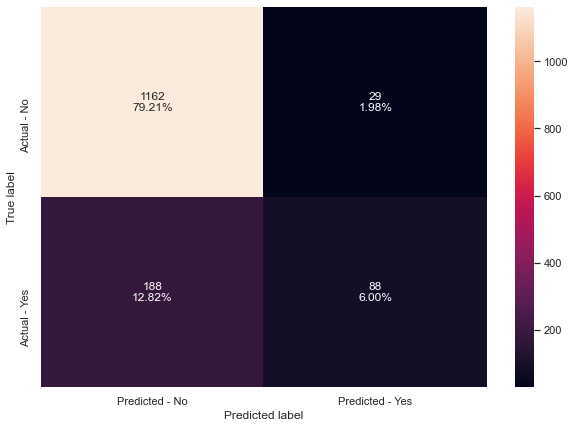

In [116]:
make_confusion_matrix(abc,y_test)

* No overfitting but Recall numbers are low.

### Gradient Boosting Classifier

In [117]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [118]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8857059339374452
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.45962732919254656
Recall on test set :  0.42028985507246375
Precision on training set :  0.8731563421828908
Precision on test set :  0.8169014084507042


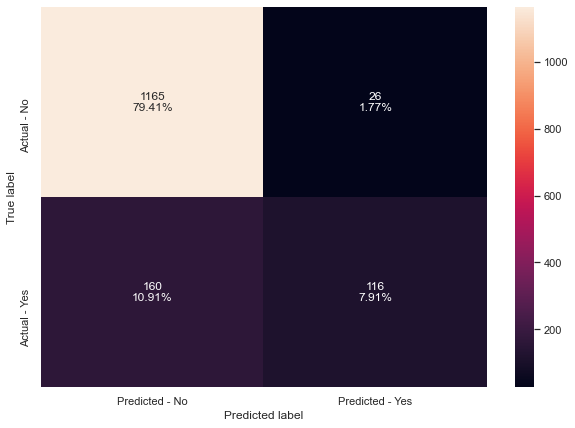

In [119]:
make_confusion_matrix(gbc,y_test)

* There is overfitting present in this model but Recall numbers have increased.

### XGBoost Classifier

In [120]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[20:18:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9222903885480572
Recall on training set :  0.9984472049689441
Recall on test set :  0.6847826086956522
Precision on training set :  1.0
Precision on test set :  0.875


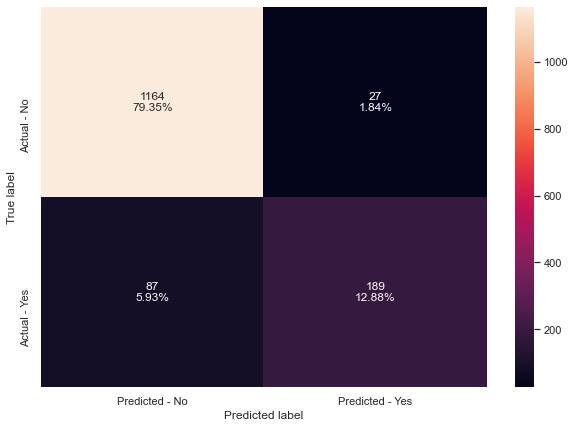

In [122]:
make_confusion_matrix(xgb,y_test)

* There is slight overfitting present in this model but the Recall numbers are higher than both AdaBoost and Gradient Boost on the test data set.

#### With default parameters:

* XGBoost has the better test accuracy, recall and precision among these 3 models.
* GradientBoost has the least accuracy and precision among these 3 models.

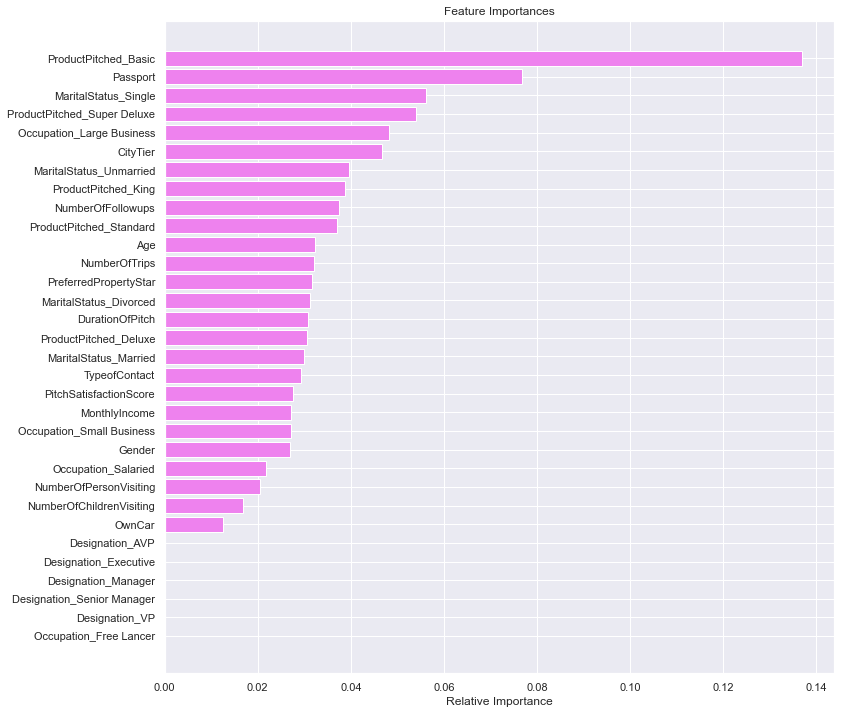

In [136]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning

### AdaBoost Classifier
* An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
* Some important hyperparamters are:
    * base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    * n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    * learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [123]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5000000000000002, n_estimators=90,
                   random_state=1)

In [124]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9807073954983923
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.9285714285714286
Recall on test set :  0.605072463768116
Precision on training set :  0.9676375404530745
Precision on test set :  0.605072463768116


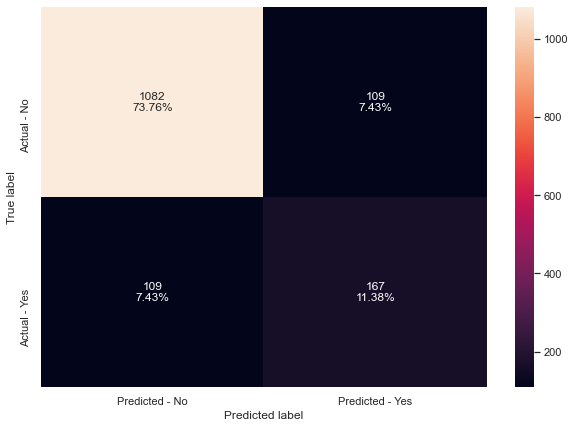

In [125]:
make_confusion_matrix(abc_tuned,y_test)

### Insights:
* Accuracy on the test data is the same as the default AdaBoost model with more overfitting. 
* The recall has improved and the precision decreased.

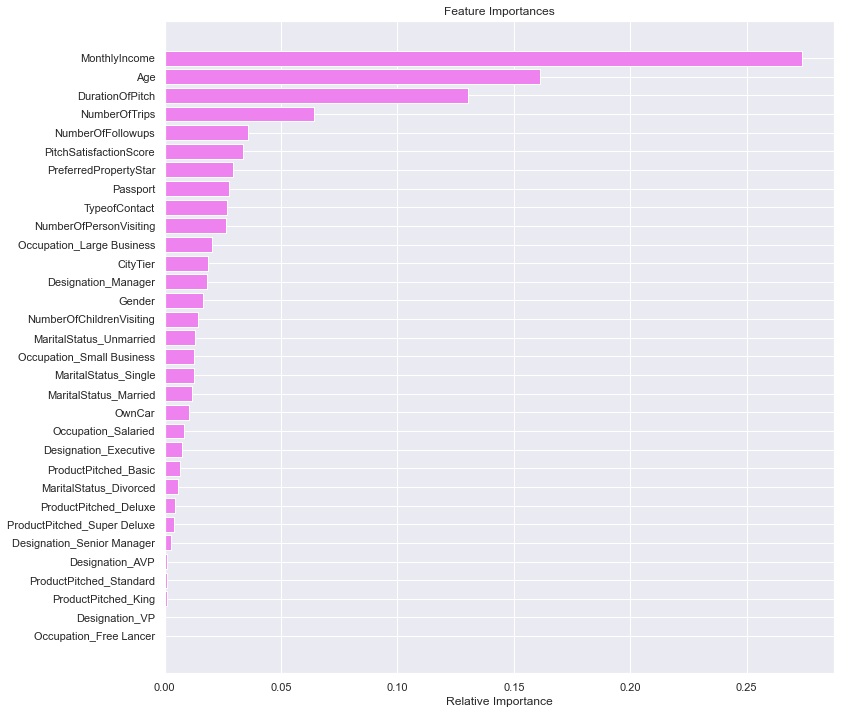

In [126]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Top 3 features of the tuned AdaBoost model are MonthlyIncome, Age and DurationOfPitch.

### Gradient Boosting Classifier

* Most of the hyperparameters available are same as random forest classifier.
* init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
* There is no class_weights parameter in gradient boosting.

#### Let's try using AdaBoost classifier as the estimator for initial predictions

In [127]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [128]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8886290558316282
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.45962732919254656
Recall on test set :  0.3804347826086957
Precision on training set :  0.8996960486322189
Precision on test set :  0.8015267175572519


#### As compared to the model with default parameters:
* Test accuracy and precision has improved and recall decreased.
* The overfitting has decreased.

In [129]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [130]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9213680210464776
Accuracy on test set :  0.8827539195637355
Recall on training set :  0.6242236024844721
Recall on test set :  0.4927536231884058
Precision on training set :  0.9370629370629371
Precision on test set :  0.8095238095238095


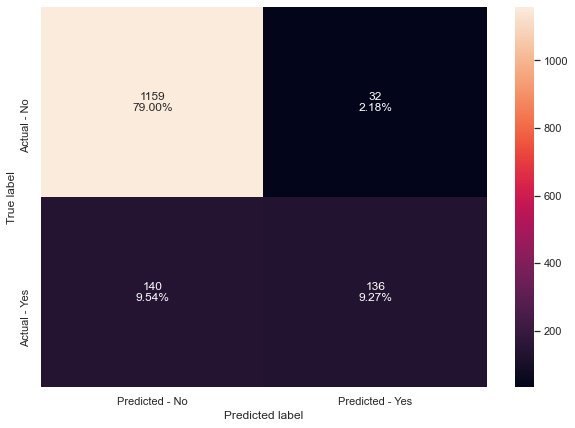

In [131]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights:
* Accuracy, recall and precision have increased on the test set compared to the previous GradientBoost model that used AdaBoost as a classifier.
* However, the overfitting has increased.

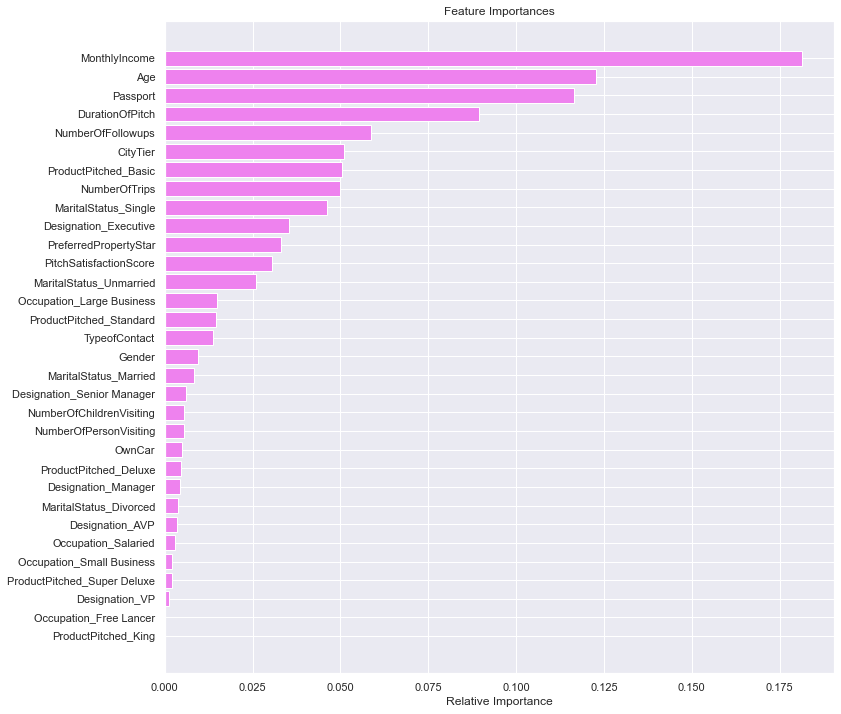

In [132]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Top 3 features of the tuned GradientBoost model are MonthlyIncome, Age and Passport.

### Comparing all models

In [134]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [135]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.85,0.31,0.32,0.70,0.75
1,AdaBoost Tuned,0.98,0.85,0.93,0.61,0.97,0.61
2,Gradient Boosting with default parameters,0.89,0.87,0.46,0.42,0.87,0.82
3,Gradient Boosting with init=AdaBoost,0.89,0.87,0.46,0.38,0.90,0.80
4,Gradient Boosting Tuned,0.92,0.88,0.62,0.49,0.94,0.81
5,XGBoost with default parameters,1.00,0.92,1.00,0.68,1.00,0.88


* We set out to find a model with the best recall in order to reduce the number of false negatives. 
* According to the comparison of models, the XGBoost model with default parameters gives us the the highest recall on the test set. 
* This model also has the highest accuracy and precision on the test set as well.
* We went back to this model and took a look at the top 3 features, *ProductPitched*, *Passport*, and *MaritalStatus*.

### Recommendations

* The company should look at targeting a single male that is about 38 years old that is an executive and has a passport.